In [1]:
from langgraph.graph import END, StateGraph
from schemas import AgentState
from nodes import WorkflowNodes
from routers import Routers


In [2]:
workflow = StateGraph(AgentState)
nodes = WorkflowNodes()
routers = Routers()

/Users/aizen/Documents/Agentic AI/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


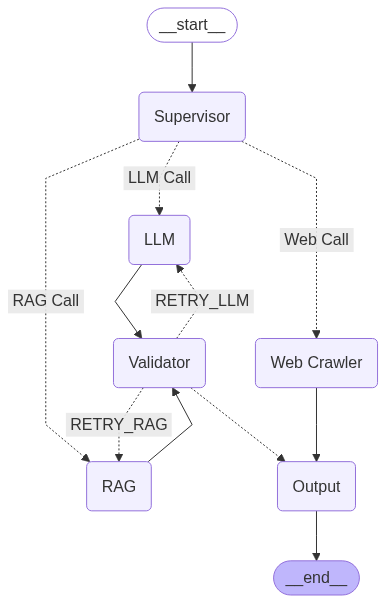

In [3]:
workflow.add_node("Supervisor", nodes.supervisor)
workflow.add_node("RAG", nodes.rag_call)
workflow.add_node("LLM", nodes.llm_call)
workflow.add_node("Web Crawler", nodes.web_call)
workflow.add_node("Validator", nodes.validator)
workflow.add_node("Output", nodes.final_output)

workflow.add_conditional_edges("Supervisor", routers.simple_router, {"RAG Call": "RAG", "LLM Call": "LLM", "Web Call" : "Web Crawler"})

workflow.add_conditional_edges(
    "Validator", 
    routers.validation_router, 
    {
        "Output": "Output",
        "RETRY_RAG": "RAG",
        "RETRY_LLM": "LLM"
    }
)

workflow.add_edge("RAG", "Validator")
workflow.add_edge("LLM", "Validator")
workflow.add_edge("Web Crawler", "Output")
workflow.add_edge("Output", END)

workflow.set_entry_point("Supervisor")

workflow.compile()

In [4]:
import io
from contextlib import redirect_stdout

# Create a text stream to capture printed output
output_stream = io.StringIO()

# Redirect all prints inside this block to the stream
with redirect_stdout(output_stream):
    app = workflow.compile()
    result = app.invoke({
        "messages": ["What is Linked List"]
    })

# Now save the captured print output to a file
with open("output.txt", "w", encoding="utf-8") as f:
    f.write(output_stream.getvalue())

print("Printed output saved to output.txt")

Printed output saved to output.txt
